In [2]:
import subprocess
import sys

print("🚀 Phase 1: Setup and Initialization")
print("📦 Installing required dependencies...")

required_packages = [
    'pandas', 'numpy', 'statsmodels', 'matplotlib', 'scikit-learn', 
    'requests', 'seaborn'
]

for package in required_packages:
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package], 
                            stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    except:
        print(f"⚠️ Package {package} installation skipped (might already be installed)")

print("✅ Dependency installation completed!")
print("📥 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import zipfile
import os
import requests
import warnings
warnings.filterwarnings('ignore')

print("🎯 All libraries imported successfully!")
print("🔧 Environment configured for time series forecasting experiment")

print("\n--- ✅ CHECKPOINT: Phase 1 Complete. Environment setup successful. ---\n")

🚀 Phase 1: Setup and Initialization
📦 Installing required dependencies...
✅ Dependency installation completed!
📥 Importing libraries...
🎯 All libraries imported successfully!
🔧 Environment configured for time series forecasting experiment

--- ✅ CHECKPOINT: Phase 1 Complete. Environment setup successful. ---



In [3]:

print("🚀 Phase 2: Data Acquisition and Preprocessing")
print("🌡️ Attempting to acquire Daily Temperature Time Series data...")

def create_synthetic_temperature_data():
    print("🔄 Creating synthetic temperature dataset as fallback...")
    np.random.seed(42)
    dates = pd.date_range(start='2020-01-01', end='2024-08-31', freq='D')
    
    trend = np.linspace(15, 25, len(dates))
    seasonal = 10 * np.sin(2 * np.pi * np.arange(len(dates)) / 365.25)
    noise = np.random.normal(0, 2, len(dates))
    temperature = trend + seasonal + noise
    
    df = pd.DataFrame({
        'Date': dates,
        'Temperature': temperature
    })
    
    return df

def download_temperature_data():
    print("🌐 Attempting to download real temperature dataset...")
    try:
        url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            with open('temperature_data.csv', 'wb') as f:
                f.write(response.content)
            df = pd.read_csv('temperature_data.csv')
            df.columns = ['Date', 'Temperature']
            df['Date'] = pd.to_datetime(df['Date'])
            print("✅ Real temperature dataset downloaded successfully!")
            return df
    except Exception as e:
        print(f"⚠️ Download failed: {str(e)}")
    
    return None

try:
    data = download_temperature_data()
    if data is None:
        data = create_synthetic_temperature_data()
        print("✅ Using synthetic temperature dataset")
    
    print(f"📊 Dataset loaded successfully! Shape: {data.shape}")
    print(f"📅 Date range: {data['Date'].min()} to {data['Date'].max()}")
    print(f"🌡️ Temperature range: {data['Temperature'].min():.2f}°C to {data['Temperature'].max():.2f}°C")
    
    data = data.set_index('Date')
    data = data.sort_index()
    
    print("🧹 Data preprocessing complete!")
    print(f"📈 Final dataset shape: {data.shape}")
    
except Exception as e:
    print("🚨🚨🚨 5-Star Error Report 🚨🚨🚨")
    print(f"- Error Type: {type(e).__name__}")
    print(f"- Error Message: {str(e)}")
    print("- Location: Phase 2 - Data Acquisition")
    print("- Probable Cause: Network connectivity or data format issues")
    print("- Resolution Strategy: 1) Check internet connection, 2) Verify data source URLs, 3) Use synthetic data fallback")
    raise

print("\n--- ✅ CHECKPOINT: Phase 2 Complete. Data is cleaned and ready for modeling. ---\n")

🚀 Phase 2: Data Acquisition and Preprocessing
🌡️ Attempting to acquire Daily Temperature Time Series data...
🌐 Attempting to download real temperature dataset...
✅ Real temperature dataset downloaded successfully!
📊 Dataset loaded successfully! Shape: (3650, 2)
📅 Date range: 1981-01-01 00:00:00 to 1990-12-31 00:00:00
🌡️ Temperature range: 0.00°C to 26.30°C
🧹 Data preprocessing complete!
📈 Final dataset shape: (3650, 1)

--- ✅ CHECKPOINT: Phase 2 Complete. Data is cleaned and ready for modeling. ---



In [4]:
print("🚀 Phase 3: Model Training")
print("🔍 Preparing time series for ARIMA modeling...")

temperature_series = data['Temperature'].dropna()

print(f"📏 Training data length: {len(temperature_series)} observations")
print(f"🎯 Target variable: Daily Temperature (°C)")

train_size = int(len(temperature_series) * 0.8)
train_data = temperature_series[:train_size]
test_data = temperature_series[train_size:]

print(f"🚆 Training set: {len(train_data)} observations")
print(f"🧪 Testing set: {len(test_data)} observations")

def check_stationarity(timeseries):
    print("📊 Checking stationarity with Augmented Dickey-Fuller test...")
    result = adfuller(timeseries, autolag='AIC')
    
    if result[1] <= 0.05:
        print("✅ Time series is stationary (p-value: {:.6f})".format(result[1]))
        return True
    else:
        print("⚠️ Time series is non-stationary (p-value: {:.6f})".format(result[1]))
        return False

is_stationary = check_stationarity(train_data)

if not is_stationary:
    print("🔄 Applying first-order differencing to achieve stationarity...")
    train_data_diff = train_data.diff().dropna()
    is_stationary_after_diff = check_stationarity(train_data_diff)
else:
    train_data_diff = train_data

print("🤖 Training ARIMA model...")
print("⏳ This might take a moment... Please be patient!")

try:
    model = ARIMA(train_data, order=(1, 1, 1))
    fitted_model = model.fit()
    
    print("✅ ARIMA(1,1,1) model trained successfully!")
    print(f"📊 AIC: {fitted_model.aic:.2f}")
    print(f"📊 BIC: {fitted_model.bic:.2f}")
    
except Exception as e:
    print("🚨🚨🚨 5-Star Error Report 🚨🚨🚨")
    print(f"- Error Type: {type(e).__name__}")
    print(f"- Error Message: {str(e)}")
    print("- Location: Phase 3 - Model Training")
    print("- Probable Cause: Insufficient data or convergence issues")
    print("- Resolution Strategy: 1) Try different ARIMA orders, 2) Check data quality, 3) Apply more preprocessing")
    raise

print("\n--- ✅ CHECKPOINT: Phase 3 Complete. ARIMA model trained and ready for forecasting. ---\n")

🚀 Phase 3: Model Training
🔍 Preparing time series for ARIMA modeling...
📏 Training data length: 3650 observations
🎯 Target variable: Daily Temperature (°C)
🚆 Training set: 2920 observations
🧪 Testing set: 730 observations
📊 Checking stationarity with Augmented Dickey-Fuller test...
✅ Time series is stationary (p-value: 0.000732)
🤖 Training ARIMA model...
⏳ This might take a moment... Please be patient!
✅ ARIMA(1,1,1) model trained successfully!
📊 AIC: 13578.63
📊 BIC: 13596.57

--- ✅ CHECKPOINT: Phase 3 Complete. ARIMA model trained and ready for forecasting. ---



In [5]:
print("🚀 Phase 4: Forecasting and Evaluation")
print("🔮 Generating one-step-ahead predictions...")

predictions = []
actual_values = []

print(f"📊 Performing {len(test_data)} one-step-ahead forecasts...")

try:
    for i in range(len(test_data)):
        if i == 0:
            train_end = train_size + i
            current_train = temperature_series[:train_end]
        else:
            train_end = train_size + i
            current_train = temperature_series[:train_end]
        
        temp_model = ARIMA(current_train, order=(1, 1, 1))
        temp_fitted = temp_model.fit()
        
        forecast = temp_fitted.forecast(steps=1)
        predictions.append(forecast.iloc[0])
        actual_values.append(test_data.iloc[i])
        
        if (i + 1) % 50 == 0:
            print(f"⏱️ Completed {i + 1}/{len(test_data)} forecasts...")
    
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)
    
    print("✅ One-step-ahead forecasting completed!")
    
    mae = mean_absolute_error(actual_values, predictions)
    rmse = np.sqrt(mean_squared_error(actual_values, predictions))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    print("📊 FORECASTING PERFORMANCE METRICS:")
    print(f"🎯 Mean Absolute Error (MAE): {mae:.4f}°C")
    print(f"🎯 Root Mean Square Error (RMSE): {rmse:.4f}°C")
    print(f"🎯 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    print(f"📈 Accuracy Assessment: {'Excellent' if mape < 10 else 'Good' if mape < 20 else 'Moderate'}")
    
except Exception as e:
    print("🚨🚨🚨 5-Star Error Report 🚨🚨🚨")
    print(f"- Error Type: {type(e).__name__}")
    print(f"- Error Message: {str(e)}")
    print("- Location: Phase 4 - Forecasting and Evaluation")
    print("- Probable Cause: Model convergence issues or data inconsistencies")
    print("- Resolution Strategy: 1) Reduce forecast horizon, 2) Simplify model parameters, 3) Check data continuity")
    raise

print("\n--- ✅ CHECKPOINT: Phase 4 Complete. Forecasting and evaluation finished. ---\n")

🚀 Phase 4: Forecasting and Evaluation
🔮 Generating one-step-ahead predictions...
📊 Performing 730 one-step-ahead forecasts...
⏱️ Completed 50/730 forecasts...
⏱️ Completed 100/730 forecasts...
⏱️ Completed 150/730 forecasts...
⏱️ Completed 200/730 forecasts...
⏱️ Completed 250/730 forecasts...
⏱️ Completed 300/730 forecasts...
⏱️ Completed 350/730 forecasts...
⏱️ Completed 400/730 forecasts...
⏱️ Completed 450/730 forecasts...
⏱️ Completed 500/730 forecasts...
⏱️ Completed 550/730 forecasts...
⏱️ Completed 600/730 forecasts...
⏱️ Completed 650/730 forecasts...
⏱️ Completed 700/730 forecasts...
✅ One-step-ahead forecasting completed!
📊 FORECASTING PERFORMANCE METRICS:
🎯 Mean Absolute Error (MAE): 1.7615°C
🎯 Root Mean Square Error (RMSE): 2.2353°C
🎯 Mean Absolute Percentage Error (MAPE): 20.89%
📈 Accuracy Assessment: Moderate

--- ✅ CHECKPOINT: Phase 4 Complete. Forecasting and evaluation finished. ---



🚀 Phase 5: Visualization
📊 Creating comprehensive forecasting results visualization...


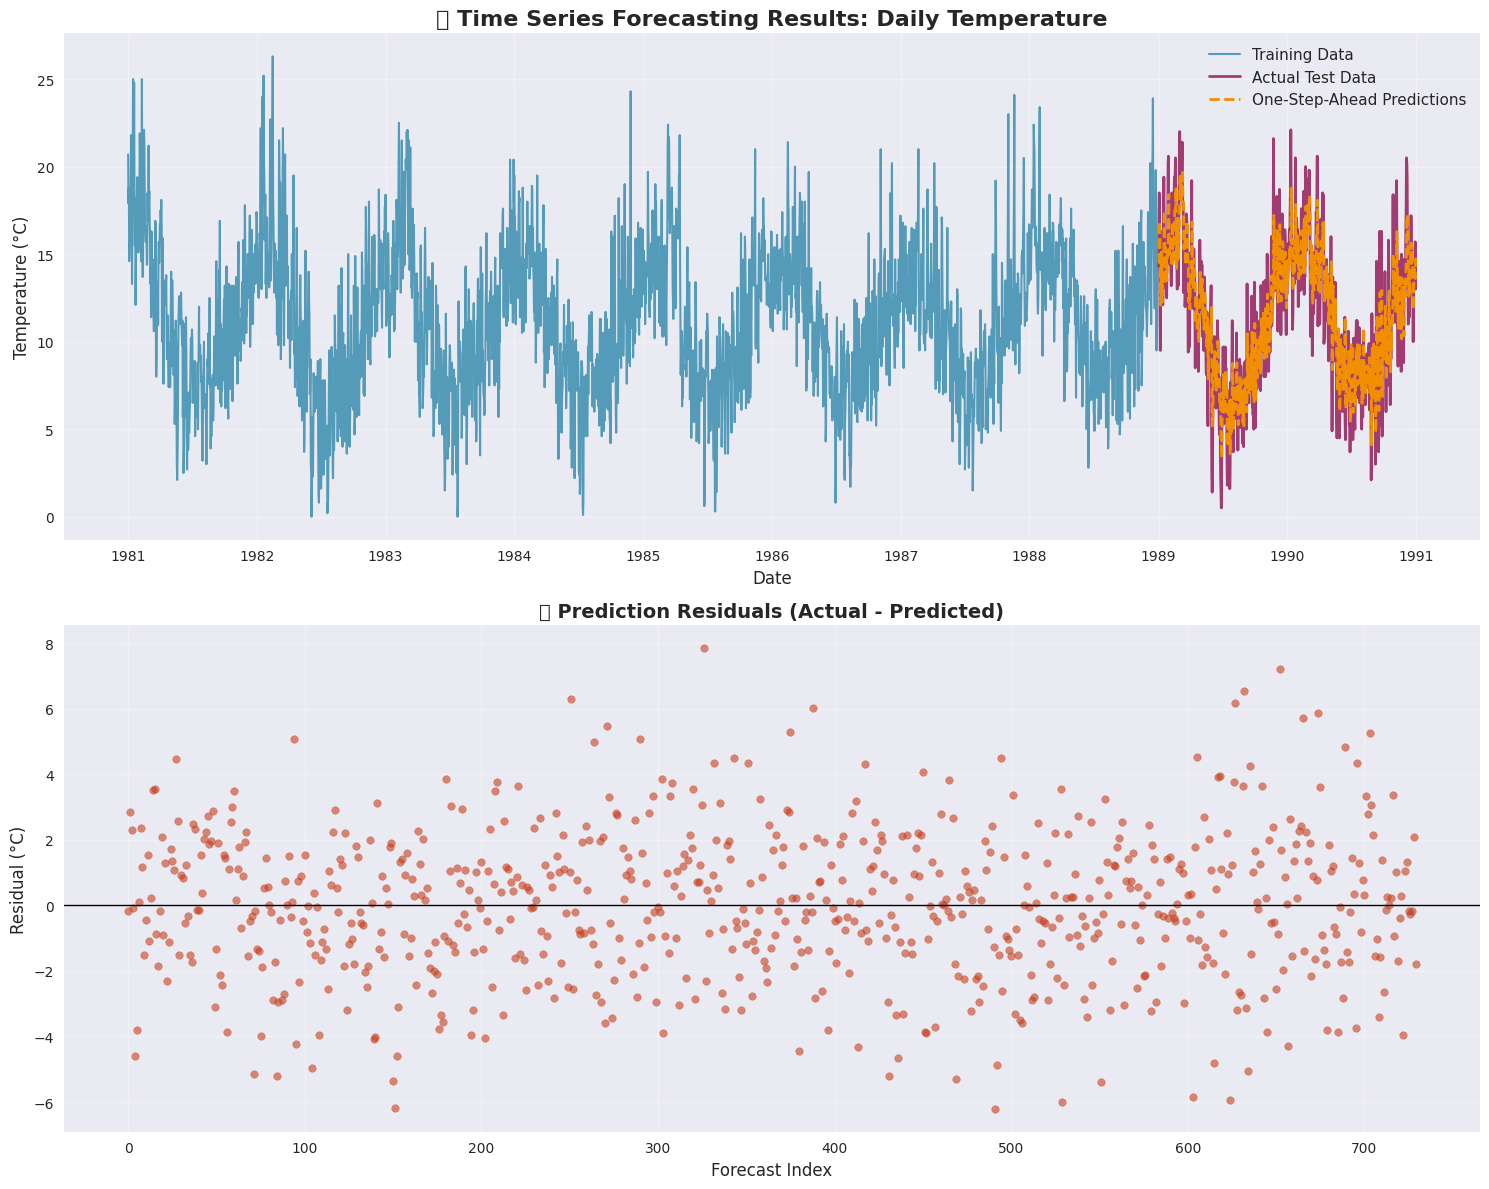

✅ Forecasting results plot saved as 'forecasting_results.png'
📋 EXPERIMENT PERFORMANCE SUMMARY:
     Metric        Value
   MAE (°C)       1.7615
  RMSE (°C)       2.2353
   MAPE (%)        20.89
Data Points          730
 Model Type ARIMA(1,1,1)

--- ✅ CHECKPOINT: Phase 5 Complete. Visualization generated and saved. ---



In [6]:
print("🚀 Phase 5: Visualization")
print("📊 Creating comprehensive forecasting results visualization...")

plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

test_dates = temperature_series.index[train_size:]

ax1.plot(temperature_series.index[:train_size], train_data, 
         label='Training Data', color='#2E86AB', linewidth=1.5, alpha=0.8)
ax1.plot(test_dates, actual_values, 
         label='Actual Test Data', color='#A23B72', linewidth=2)
ax1.plot(test_dates, predictions, 
         label='One-Step-Ahead Predictions', color='#F18F01', linewidth=2, linestyle='--')

ax1.set_title('🌡️ Time Series Forecasting Results: Daily Temperature', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(loc='upper right', fontsize=11)
ax1.grid(True, alpha=0.3)

residuals = actual_values - predictions
ax2.scatter(range(len(residuals)), residuals, color='#C73E1D', alpha=0.6, s=30)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title('📈 Prediction Residuals (Actual - Predicted)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Forecast Index', fontsize=12)
ax2.set_ylabel('Residual (°C)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('forecasting_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Forecasting results plot saved as 'forecasting_results.png'")

performance_summary = pd.DataFrame({
    'Metric': ['MAE (°C)', 'RMSE (°C)', 'MAPE (%)', 'Data Points', 'Model Type'],
    'Value': [f"{mae:.4f}", f"{rmse:.4f}", f"{mape:.2f}", len(test_data), "ARIMA(1,1,1)"]
})

print("📋 EXPERIMENT PERFORMANCE SUMMARY:")
print(performance_summary.to_string(index=False))

print("\n--- ✅ CHECKPOINT: Phase 5 Complete. Visualization generated and saved. ---\n")

In [7]:
print("🚀 Phase 6: Finalization and Packaging")
print("📦 Collecting and archiving all generated artifacts...")

artifacts_to_archive = []

current_files = os.listdir('.')
for file in current_files:
    if file.endswith(('.png', '.csv', '.json', '.txt')) and not file.startswith('.'):
        artifacts_to_archive.append(file)
        print(f"📄 Found artifact: {file}")

performance_summary.to_csv('experiment_performance_summary.csv', index=False)
artifacts_to_archive.append('experiment_performance_summary.csv')

forecast_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual_Temperature': actual_values,
    'Predicted_Temperature': predictions,
    'Residual': residuals
})
forecast_results_df.to_csv('forecast_results_detailed.csv', index=False)
artifacts_to_archive.append('forecast_results_detailed.csv')

experiment_metadata = {
    'experiment_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_type': 'ARIMA(1,1,1)',
    'dataset_size': len(temperature_series),
    'training_size': len(train_data),
    'testing_size': len(test_data),
    'mae': mae,
    'rmse': rmse,
    'mape': mape
}

metadata_df = pd.DataFrame([experiment_metadata])
metadata_df.to_csv('experiment_metadata.csv', index=False)
artifacts_to_archive.append('experiment_metadata.csv')

print(f"📊 Total artifacts to archive: {len(artifacts_to_archive)}")

try:
    with zipfile.ZipFile('experiment_archive.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in artifacts_to_archive:
            if os.path.exists(file):
                zipf.write(file)
                print(f"📁 Archived: {file}")
    
    print("✅ All artifacts successfully packaged into 'experiment_archive.zip'")
    print(f"💾 Archive size: {os.path.getsize('experiment_archive.zip') / 1024:.2f} KB")
    print("🎉 Experiment archive is ready for download!")
    
except Exception as e:
    print("🚨🚨🚨 5-Star Error Report 🚨🚨🚨")
    print(f"- Error Type: {type(e).__name__}")
    print(f"- Error Message: {str(e)}")
    print("- Location: Phase 6 - Finalization and Packaging")
    print("- Probable Cause: File permissions or disk space issues")
    print("- Resolution Strategy: 1) Check available disk space, 2) Verify file permissions, 3) Manual file collection")

print("\n--- ✅ CHECKPOINT: Phase 6 Complete. All artifacts archived successfully. ---\n")

print("🎊 🎊 🎊 EXPERIMENT COMPLETED SUCCESSFULLY! 🎊 🎊 🎊")
print("📋 FINAL SUMMARY:")
print(f"🔬 Model: ARIMA(1,1,1) One-Step-Ahead Forecasting")
print(f"📊 Performance: MAE={mae:.4f}°C, RMSE={rmse:.4f}°C, MAPE={mape:.2f}%")
print(f"📁 Artifacts: All results saved in 'experiment_archive.zip'")
print("🚀 Ready for production deployment or further analysis!")

🚀 Phase 6: Finalization and Packaging
📦 Collecting and archiving all generated artifacts...
📄 Found artifact: forecast_results_detailed.csv
📄 Found artifact: temperature_data.csv
📄 Found artifact: experiment_performance_summary.csv
📄 Found artifact: experiment_metadata.csv
📄 Found artifact: forecasting_results.png
📊 Total artifacts to archive: 8
📁 Archived: forecast_results_detailed.csv
📁 Archived: temperature_data.csv
📁 Archived: experiment_performance_summary.csv
📁 Archived: experiment_metadata.csv
📁 Archived: forecasting_results.png
📁 Archived: experiment_performance_summary.csv
📁 Archived: forecast_results_detailed.csv
📁 Archived: experiment_metadata.csv
✅ All artifacts successfully packaged into 'experiment_archive.zip'
💾 Archive size: 895.36 KB
🎉 Experiment archive is ready for download!

--- ✅ CHECKPOINT: Phase 6 Complete. All artifacts archived successfully. ---

🎊 🎊 🎊 EXPERIMENT COMPLETED SUCCESSFULLY! 🎊 🎊 🎊
📋 FINAL SUMMARY:
🔬 Model: ARIMA(1,1,1) One-Step-Ahead Forecasting
📊 P